# Problem 2

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import tree
from sklearn.tree import _tree
from sklearn.model_selection import train_test_split

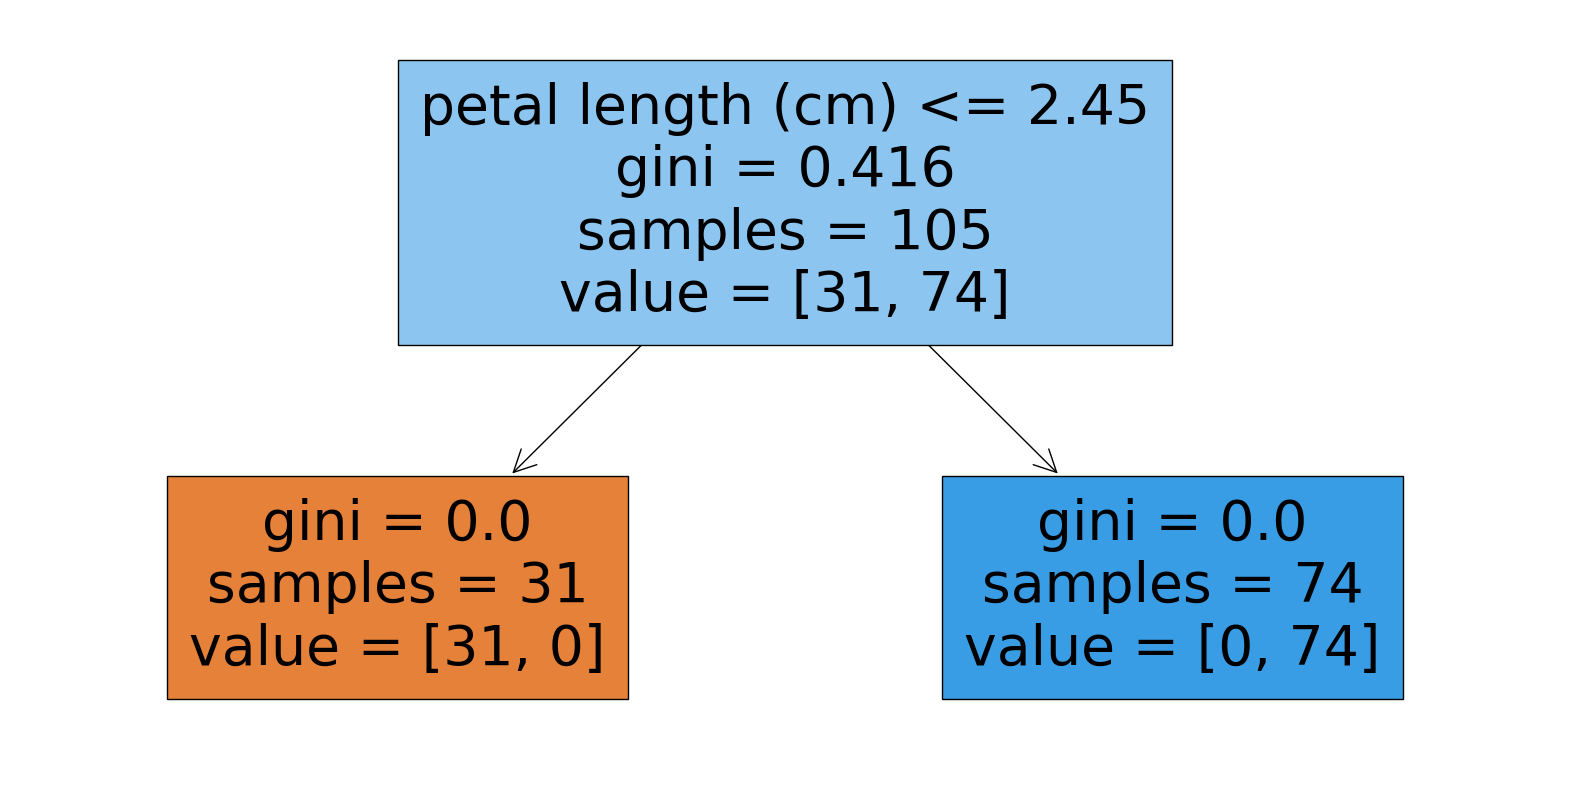

Test Error: 0.0


In [9]:
# ===== Load the Iris dataset ===== #
iris = load_iris()
X, y = iris.data, iris.target
# ===== End of Load the Iris dataset ===== #

# ===== Merge classes for binary classification ===== #
y_binary = np.where(y > 0, 1, 0)
# ===== End of Merge classes for binary classification ===== #

# ===== Splitting data into training and testing sets ===== #
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)
# ===== End of Splitting data into training and testing sets ===== #

# ===== Train the Decision Tree ===== #
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# ===== End of Train the Decision Tree ===== #

# ===== Plotting the Decision Tree ===== #
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=iris.feature_names)
plt.show()
# ===== End of Plotting the Decision Tree ===== #

# ===== Test the decision tree and report test error ===== #
y_pred = dt.predict(X_test)
test_error = 1 - accuracy_score(y_test, y_pred)
print(f"Test Error: {test_error}")
# ===== End of Test the decision tree and report test error ===== #


In [10]:
# ===== Build decision tree classifier ===== #
dt_classifier = DecisionTreeClassifier() 
dt_classifier.fit(X_train, y_train)      
# ===== End of Build decision tree classifier ===== #

def tree_to_code(tree, feature_names):
    
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold:.2f}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold:.2f}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}return {np.argmax(tree_.value[node])}")

    recurse(0, 0)
    
    """
    Outputs a decision tree model as a Python function

    Parameters:
    -----------
    tree: decision tree model
    The decision tree to represent as a function
    feature_names: list
    The feature names of the dataset used for building the decision tree
    """

# ===== Implement the function ===== #
# Reference: https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html
# ===== End of Implement the function ===== #


In [11]:
# Print the tree
tree_to_code(dt, list(iris.feature_names))

if petal length (cm) <= 2.45:
  return 0
else:  # if petal length (cm) > 2.45
  return 1
